# Aspect Term Extraction and Sentiment Classification
Drafted for v2.0 and higher versions. Note there are many breaking changes in v2.0, so you do not need to upgrade to v2.0 and higher versions if you are using code, API, checkpoints, datasets or anything from v1.0. Let's begin the introduction.

In [ ]:
!pip install pyabsa -U
from pyabsa import AspectSentimentTripletExtraction as ASTE

# Training Stage

# Get a configuration
There are three types of APC models for aspect term extraction, which are based on the local context focus mechanism
Notice: when you select to use a model, please make sure to carefully manage the configurations, e.g., for glove-based models, you need to set hidden dim and embed_dim manually.
We already provide some pre-defined configurations. Refer to the source code if you have any question
e.g.,

In [2]:
config = (
    ASTE.ASTEConfigManager.get_aste_config_english()
)  # this config contains 'pretrained_bert', it is based on pretrained models

# Set the model

In [3]:
config.model = ASTE.ASTEModelList.EMCGCN  # improved version of LCF-ATEPC


# Set the dataset
There are the [datasets](https://github.com/yangheng95/ABSADatasets) from publication or third-party contribution. There dataset can be downloaded and processed automatically.
In pyabsa, you can pass a set of datasets to train a model.
e.g., for using integrated datasets:


In [4]:
from pyabsa import DatasetItem

dataset = ASTE.ASTEDatasetList.Restaurant14
# now the dataset is a DatasetItem object, which has a name and a list of subdatasets
# e.g., SemEval dataset contains Laptop14, Restaurant14, Restaurant16 datasets

# or you can pass a list of datasets
# my_dataset = DatasetItem("my_dataset", ["my_dataset1", "my_dataset2", ATEPC.ATEPCDatasetList.Restaurant14])
# my_dataset1 and my_dataset2 are the dataset folders. In there folders, the train dataset is necessary

You can use your own dataset provided that it is formatted according to [ABSADatasets](https://github.com/yangheng95/ABSADatasets#important-rename-your-dataset-filename-before-use-it-in-pyabsa)

In [5]:
# Put your dataset into integrated_datasets folder, it this folder does not exist, you need to call:
from pyabsa import download_all_available_datasets

download_all_available_datasets()

[2023-03-09 19:20:46] (2.1.5) Datasets already exist in C:\Users\chuan\OneDrive - University of Exeter\AIProjects\PyABSA\examples-v2\aspect_sentiment_triplet_extration\integrated_datasets, skip download


# Start training

In [6]:
from pyabsa import ModelSaveOption, DeviceTypeOption
import warnings

warnings.filterwarnings("ignore")

config.batch_size = 16
config.patience = 999
config.log_step = -1
config.seed = [1, 2, 3]
config.verbose = False  # If verbose == True, PyABSA will output the model structure and several processed data examples
config.notice = (
    "This is an training example for aspect term extraction"  # for memos usage
)

trainer = ASTE.ASTETrainer(
    config=config,
    dataset=dataset,
    # from_checkpoint="english",  # if you want to resume training from our pretrained checkpoints, you can pass the checkpoint name here
    auto_device=DeviceTypeOption.AUTO,  # use cuda if available
    checkpoint_save_mode=ModelSaveOption.SAVE_MODEL_STATE_DICT,  # save state dict only instead of the whole model
    load_aug=False,  # there are some augmentation dataset for integrated datasets, you use them by setting load_aug=True to improve performance
)

[2023-03-09 19:20:46] (2.1.5) Set Model Device: cuda:0
[2023-03-09 19:20:46] (2.1.5) Device Name: NVIDIA GeForce RTX 3060
2023-03-09 19:20:47,364 INFO: PyABSA version: 2.1.5
2023-03-09 19:20:47,365 INFO: Transformers version: 4.25.1
2023-03-09 19:20:47,366 INFO: Torch version: 1.13.1+cuda11.7
2023-03-09 19:20:47,366 INFO: Device: NVIDIA GeForce RTX 3060
2023-03-09 19:20:47,371 INFO: Searching dataset 402.Restaurant14 in local disk
2023-03-09 19:20:47,494 INFO: You can set load_aug=True in a trainer to augment your dataset (English only yet) and improve performance.
2023-03-09 19:20:47,495 INFO: Please use a new folder to perform new text augment if the former augment in integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14 errored unexpectedly
2023-03-09 19:20:49,142 INFO: Load dataset from integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\train.txt


preparing dataloader: 100%|██████████| 1266/1266 [00:05<00:00, 224.61it/s]


2023-03-09 19:20:55,887 INFO: Load dataset from integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\test.txt


preparing dataloader:  55%|█████▍    | 269/492 [00:01<00:00, 224.13it/s]

They have homemade pastas of all kinds    I recommend the gnocchi    yum !
They have homemade pastas of all kinds -- I recommend the gnocchi -- yum !####[([11], [9], 'POS'), ([11], [13], 'POS')]
[([11], [9], 'POS'), ([11], [13], 'POS')]


preparing dataloader: 100%|██████████| 492/492 [00:02<00:00, 217.17it/s]


2023-03-09 19:20:58,771 INFO: Load dataset from integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\dev.txt


preparing dataloader: 100%|██████████| 310/310 [00:01<00:00, 227.13it/s]


building vocab...


converting data to features:  73%|███████▎  | 924/1266 [00:12<00:04, 72.56it/s] 

[2023-03-09 19:21:12] (2.1.5) Processing error for: I must warn the reader that the portions sizes are very small ( especially the appetizers ) , so if you plan to eat until you are full and do not intend to order the chef 's special tasting menu , prepare to order and pay for an appetizer ( 1 dish for each person because the portions are not for sharing ) , a main entree , and the cold udon at the end of the meal .. Exception: 


converting data to features:  47%|████▋     | 233/491 [00:02<00:02, 87.95it/s] 

[2023-03-09 19:21:18] (2.1.5) Processing error for: THE SERVICE IS PERFECT TOO NOTHING WRONG IN THIS ITALIAN/FRENCH RESTAURANT. Exception: list index out of range


converting data to features: 100%|██████████| 310/310 [00:03<00:00, 93.09it/s] 

2023-03-09 19:21:25,979 INFO: Save cache dataset to emcgcn.Restaurant14.dataset.2f6b5cb980ebdafb05459c7f13e1e39ad2ac1a163b9d37c01f675c0d54b1dac9.cache



Some weights of the model checkpoint at yangheng/deberta-v3-base-absa-v1.1 were not used when initializing DebertaV2Model: ['pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[2023-03-09 19:21:31] (2.1.5) ABSADatasetsVersion:None	-->	Calling Count:0
[2023-03-09 19:21:31] (2.1.5) MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x000002AFCCEC2F80>	-->	Calling Count:0
[2023-03-09 19:21:31] (2.1.5) PyABSAVersion:2.1.5	-->	Calling Count:1
[2023-03-09 19:21:31] (2.1.5) SRD:3	-->	Calling Count:0
[2023-03-09 19:21:31] (2.1.5) TorchVersion:1.13.1+cuda11.7	-->	Calling Count:1
[2023-03-09 19:21:31] (2.1.5) TransformersVersion:4.25.1	-->	Calling Count:1
[2023-03-09 19:21:31] (2.1.5) adam_epsilon:1e-08	-->	Calling Count:1
[2023-03-09 19:21:31] (2.1.5) auto_device:True	-->	Calling Count:2
[2023-03-09 19:21:31] (2.1.5) batch_size:16	-->	Calling Count:0
[2023-03-09 19:21:31] (2.1.5) cache_dataset:True	-->	Calling Count:1
[2023-03-09 19:21:31] (2.1.5) checkpoint_save_mode:1	-->	Calling Count:4
[2023-03-09 19:21:31] (2.1.5) cross_validate_fold:-1	-->	Calling Count:0
[2023-03-09 19:21:31] (2.1.5) dataset_file:{'train': ['integrated_datasets\\datasets\\aste_

Epoch:  0 | Smooth Loss: 0.5547: 100%|██████████| 80/80 [00:30<00:00,  2.63it/s, Dev F1:12.74(max:12.74)]
Epoch:  1 | Smooth Loss: 0.4470: 100%|██████████| 80/80 [00:27<00:00,  2.89it/s, Dev F1:36.74(max:36.74)]
Epoch:  2 | Smooth Loss: 0.3955: 100%|██████████| 80/80 [00:27<00:00,  2.88it/s, Dev F1:40.90(max:40.90)]
Epoch:  3 | Smooth Loss: 0.3597: 100%|██████████| 80/80 [00:27<00:00,  2.94it/s, Dev F1:56.14(max:56.14)]
Epoch:  4 | Smooth Loss: 0.3322: 100%|██████████| 80/80 [00:27<00:00,  2.93it/s, Dev F1:58.19(max:58.19)]
Epoch:  5 | Smooth Loss: 0.3103: 100%|██████████| 80/80 [00:27<00:00,  2.95it/s, Dev F1:61.15(max:61.15)]
Epoch:  6 | Smooth Loss: 0.2913: 100%|██████████| 80/80 [00:27<00:00,  2.94it/s, Dev F1:65.19(max:65.19)]
Epoch:  7 | Smooth Loss: 0.2752: 100%|██████████| 80/80 [00:25<00:00,  3.11it/s, Dev F1:62.68(max:65.19)]
Epoch:  8 | Smooth Loss: 0.2615: 100%|██████████| 80/80 [00:25<00:00,  3.09it/s, Dev F1:61.46(max:65.19)]
Epoch:  9 | Smooth Loss: 0.2491: 100%|████████

[2023-03-09 19:26:05] (2.1.5) Loading best model: checkpoints/emcgcn_Restaurant14_f1_67.64/ and evaluating on test set 
2023-03-09 19:26:07,979 INFO: 
----------------------------------------------------------- Raw Metric Records -----------------------------------------------------------
╒═════════════╤════════════════════════════════════════════════════════╤══════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric      │ Trial                                                  │ Values   │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞═════════════╪════════════════════════════════════════════════════════╪══════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-Test-F1 │ emcgcn-Restaurant14-yangheng/deberta-v3-base-absa-v1.1 │ [67.64]  │   67.64   │  67.64   │   0   │   0   │ 67.64 │ 67.64 │
╘═════════════╧════════════════════════════════════════════════════════╧══════════╧═══════════╧══════════╧═══════╧═══════╧═══════╧═══════╛
---------------

preparing dataloader: 100%|██████████| 1266/1266 [00:05<00:00, 218.88it/s]


2023-03-09 19:26:19,277 INFO: Load dataset from integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\test.txt


preparing dataloader:  59%|█████▊    | 288/492 [00:01<00:00, 225.96it/s]

They have homemade pastas of all kinds    I recommend the gnocchi    yum !
They have homemade pastas of all kinds -- I recommend the gnocchi -- yum !####[([11], [9], 'POS'), ([11], [13], 'POS')]
[([11], [9], 'POS'), ([11], [13], 'POS')]


preparing dataloader: 100%|██████████| 492/492 [00:02<00:00, 207.59it/s]


2023-03-09 19:26:22,212 INFO: Load dataset from integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\dev.txt


converting data to features:  73%|███████▎  | 929/1266 [00:11<00:04, 75.17it/s] 

[2023-03-09 19:26:35] (2.1.5) Processing error for: I must warn the reader that the portions sizes are very small ( especially the appetizers ) , so if you plan to eat until you are full and do not intend to order the chef 's special tasting menu , prepare to order and pay for an appetizer ( 1 dish for each person because the portions are not for sharing ) , a main entree , and the cold udon at the end of the meal .. Exception: 


converting data to features:  48%|████▊     | 238/491 [00:02<00:02, 114.20it/s]

[2023-03-09 19:26:41] (2.1.5) Processing error for: THE SERVICE IS PERFECT TOO NOTHING WRONG IN THIS ITALIAN/FRENCH RESTAURANT. Exception: list index out of range


converting data to features: 100%|██████████| 310/310 [00:03<00:00, 90.53it/s] 

2023-03-09 19:26:48,637 INFO: Save cache dataset to emcgcn.Restaurant14.dataset.0a8a3da5ee02f7919d6e342df638a1c627da3c419893d91d764367c0f9e176c3.cache



Some weights of the model checkpoint at yangheng/deberta-v3-base-absa-v1.1 were not used when initializing DebertaV2Model: ['pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[2023-03-09 19:26:56] (2.1.5) ABSADatasetsVersion:None	-->	Calling Count:0
[2023-03-09 19:26:56] (2.1.5) MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x000002AFCCEC2F80>	-->	Calling Count:2
[2023-03-09 19:26:56] (2.1.5) PyABSAVersion:2.1.5	-->	Calling Count:1
[2023-03-09 19:26:56] (2.1.5) SRD:3	-->	Calling Count:0
[2023-03-09 19:26:56] (2.1.5) TorchVersion:1.13.1+cuda11.7	-->	Calling Count:1
[2023-03-09 19:26:56] (2.1.5) TransformersVersion:4.25.1	-->	Calling Count:1
[2023-03-09 19:26:56] (2.1.5) adam_epsilon:1e-08	-->	Calling Count:2
[2023-03-09 19:26:56] (2.1.5) auto_device:True	-->	Calling Count:802
[2023-03-09 19:26:56] (2.1.5) batch_size:16	-->	Calling Count:2286
[2023-03-09 19:26:56] (2.1.5) cache_dataset:True	-->	Calling Count:2
[2023-03-09 19:26:56] (2.1.5) checkpoint_save_mode:1	-->	Calling Count:5
[2023-03-09 19:26:56] (2.1.5) cross_validate_fold:-1	-->	Calling Count:1
[2023-03-09 19:26:56] (2.1.5) dataset_file:{'train': ['integrated_datasets\\datasets\\

Epoch:  0 | Smooth Loss: 0.5670: 100%|██████████| 80/80 [00:28<00:00,  2.83it/s, Dev F1:34.97(max:34.97)]
Epoch:  1 | Smooth Loss: 0.4504: 100%|██████████| 80/80 [00:27<00:00,  2.88it/s, Dev F1:37.98(max:37.98)]
Epoch:  2 | Smooth Loss: 0.3951: 100%|██████████| 80/80 [00:26<00:00,  2.99it/s, Dev F1:43.89(max:43.89)]
Epoch:  3 | Smooth Loss: 0.3579: 100%|██████████| 80/80 [00:27<00:00,  2.96it/s, Dev F1:53.20(max:53.20)]
Epoch:  4 | Smooth Loss: 0.3300: 100%|██████████| 80/80 [00:26<00:00,  2.99it/s, Dev F1:57.50(max:57.50)]
Epoch:  5 | Smooth Loss: 0.3070: 100%|██████████| 80/80 [00:26<00:00,  2.96it/s, Dev F1:64.38(max:64.38)]
Epoch:  6 | Smooth Loss: 0.2876: 100%|██████████| 80/80 [00:26<00:00,  3.00it/s, Dev F1:65.91(max:65.91)]
Epoch:  7 | Smooth Loss: 0.2722: 100%|██████████| 80/80 [00:26<00:00,  2.98it/s, Dev F1:66.57(max:66.57)]
Epoch:  8 | Smooth Loss: 0.2594: 100%|██████████| 80/80 [00:26<00:00,  2.98it/s, Dev F1:67.62(max:67.62)]
Epoch:  9 | Smooth Loss: 0.2480: 100%|████████

[2023-03-09 19:31:26] (2.1.5) Loading best model: checkpoints/emcgcn_Restaurant14_f1_67.62/ and evaluating on test set 
2023-03-09 19:31:29,593 INFO: 
-------------------------------------------------------------- Raw Metric Records --------------------------------------------------------------
╒═════════════╤════════════════════════════════════════════════════════╤════════════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric      │ Trial                                                  │ Values         │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞═════════════╪════════════════════════════════════════════════════════╪════════════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-Test-F1 │ emcgcn-Restaurant14-yangheng/deberta-v3-base-absa-v1.1 │ [67.64, 67.62] │   67.63   │  67.63   │ 0.01  │ 0.01  │ 67.62 │ 67.64 │
╘═════════════╧════════════════════════════════════════════════════════╧════════════════╧═══════════╧══════════╧═══════╧════

preparing dataloader: 100%|██████████| 1266/1266 [00:05<00:00, 223.32it/s]


2023-03-09 19:31:40,833 INFO: Load dataset from integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\test.txt


preparing dataloader:  55%|█████▌    | 273/492 [00:01<00:00, 231.95it/s]

They have homemade pastas of all kinds    I recommend the gnocchi    yum !
They have homemade pastas of all kinds -- I recommend the gnocchi -- yum !####[([11], [9], 'POS'), ([11], [13], 'POS')]
[([11], [9], 'POS'), ([11], [13], 'POS')]


preparing dataloader: 100%|██████████| 492/492 [00:02<00:00, 225.44it/s]


2023-03-09 19:31:43,596 INFO: Load dataset from integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\dev.txt


converting data to features:  74%|███████▍  | 937/1266 [00:12<00:04, 69.42it/s] 

[2023-03-09 19:31:56] (2.1.5) Processing error for: I must warn the reader that the portions sizes are very small ( especially the appetizers ) , so if you plan to eat until you are full and do not intend to order the chef 's special tasting menu , prepare to order and pay for an appetizer ( 1 dish for each person because the portions are not for sharing ) , a main entree , and the cold udon at the end of the meal .. Exception: 


converting data to features:  47%|████▋     | 233/491 [00:02<00:02, 112.81it/s]

[2023-03-09 19:32:02] (2.1.5) Processing error for: THE SERVICE IS PERFECT TOO NOTHING WRONG IN THIS ITALIAN/FRENCH RESTAURANT. Exception: list index out of range


converting data to features: 100%|██████████| 310/310 [00:03<00:00, 94.89it/s] 

2023-03-09 19:32:10,112 INFO: Save cache dataset to emcgcn.Restaurant14.dataset.88dbc03717cbbc9144f1f972f6775ec97751bd0fff5a65fd1e6b730cda5b27f5.cache



Some weights of the model checkpoint at yangheng/deberta-v3-base-absa-v1.1 were not used when initializing DebertaV2Model: ['pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[2023-03-09 19:32:17] (2.1.5) ABSADatasetsVersion:None	-->	Calling Count:0
[2023-03-09 19:32:17] (2.1.5) MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x000002AFCCEC2F80>	-->	Calling Count:4
[2023-03-09 19:32:17] (2.1.5) PyABSAVersion:2.1.5	-->	Calling Count:1
[2023-03-09 19:32:17] (2.1.5) SRD:3	-->	Calling Count:0
[2023-03-09 19:32:17] (2.1.5) TorchVersion:1.13.1+cuda11.7	-->	Calling Count:1
[2023-03-09 19:32:17] (2.1.5) TransformersVersion:4.25.1	-->	Calling Count:1
[2023-03-09 19:32:17] (2.1.5) adam_epsilon:1e-08	-->	Calling Count:3
[2023-03-09 19:32:17] (2.1.5) auto_device:True	-->	Calling Count:1602
[2023-03-09 19:32:17] (2.1.5) batch_size:16	-->	Calling Count:4572
[2023-03-09 19:32:17] (2.1.5) cache_dataset:True	-->	Calling Count:3
[2023-03-09 19:32:17] (2.1.5) checkpoint_save_mode:1	-->	Calling Count:6
[2023-03-09 19:32:17] (2.1.5) cross_validate_fold:-1	-->	Calling Count:2
[2023-03-09 19:32:17] (2.1.5) dataset_file:{'train': ['integrated_datasets\\datasets\

Epoch:  0 | Smooth Loss: 0.5266: 100%|██████████| 80/80 [00:26<00:00,  2.98it/s, Dev F1:9.01(max:9.01)]
Epoch:  1 | Smooth Loss: 0.4345: 100%|██████████| 80/80 [00:26<00:00,  2.96it/s, Dev F1:36.03(max:36.03)]
Epoch:  2 | Smooth Loss: 0.3845: 100%|██████████| 80/80 [00:26<00:00,  2.96it/s, Dev F1:39.87(max:39.87)]
Epoch:  3 | Smooth Loss: 0.3499: 100%|██████████| 80/80 [00:25<00:00,  3.11it/s, Dev F1:32.80(max:39.87)]
Epoch:  4 | Smooth Loss: 0.3244: 100%|██████████| 80/80 [00:26<00:00,  2.97it/s, Dev F1:51.16(max:51.16)]
Epoch:  5 | Smooth Loss: 0.3027: 100%|██████████| 80/80 [00:26<00:00,  3.00it/s, Dev F1:59.11(max:59.11)]
Epoch:  6 | Smooth Loss: 0.2841: 100%|██████████| 80/80 [00:25<00:00,  3.08it/s, Dev F1:59.08(max:59.11)]
Epoch:  7 | Smooth Loss: 0.2678: 100%|██████████| 80/80 [00:26<00:00,  2.97it/s, Dev F1:66.16(max:66.16)]
Epoch:  8 | Smooth Loss: 0.2535: 100%|██████████| 80/80 [00:25<00:00,  3.10it/s, Dev F1:65.82(max:66.16)]
Epoch:  9 | Smooth Loss: 0.2411: 100%|██████████

[2023-03-09 19:36:42] (2.1.5) Loading best model: checkpoints/emcgcn_Restaurant14_f1_66.16/ and evaluating on test set 
2023-03-09 19:36:45,688 INFO: 
----------------------------------------------------------------- Raw Metric Records -----------------------------------------------------------------
╒═════════════╤════════════════════════════════════════════════════════╤═══════════════════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric      │ Trial                                                  │ Values                │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞═════════════╪════════════════════════════════════════════════════════╪═══════════════════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-Test-F1 │ emcgcn-Restaurant14-yangheng/deberta-v3-base-absa-v1.1 │ [67.64, 67.62, 66.16] │   67.14   │  67.62   │ 0.69  │ 0.74  │ 66.16 │ 67.64 │
╘═════════════╧════════════════════════════════════════════════════════╧══════════════════

## Visualizations

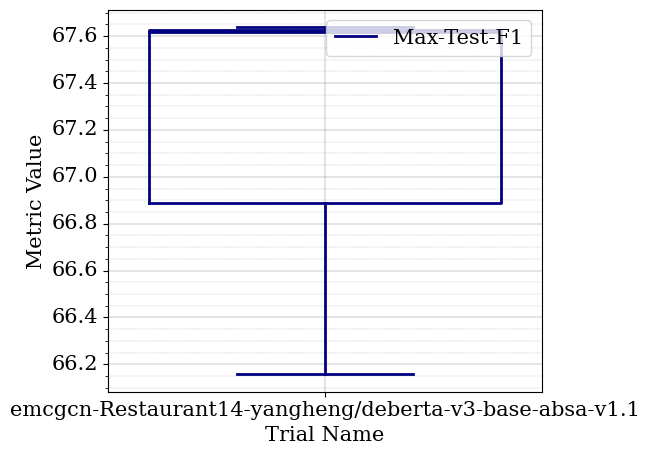

In [7]:
config.MV.box_plot(no_overlap=False)
# need to fine-tune visualization parameters, see the doc of metric-visualizer

to load trained model for inference:

In [8]:
aspect_triplet_extractor = trainer.load_trained_model()
assert isinstance(aspect_triplet_extractor, ASTE.AspectSentimentTripletExtractor)

[2023-03-09 19:36:49] (2.1.5) Load sentiment classifier from checkpoints/emcgcn_Restaurant14_f1_67.64/
[2023-03-09 19:36:49] (2.1.5) config: checkpoints/emcgcn_Restaurant14_f1_67.64/emcgcn.config
[2023-03-09 19:36:49] (2.1.5) state_dict: checkpoints/emcgcn_Restaurant14_f1_67.64/emcgcn.state_dict
[2023-03-09 19:36:49] (2.1.5) model: None
[2023-03-09 19:36:49] (2.1.5) tokenizer: checkpoints/emcgcn_Restaurant14_f1_67.64/emcgcn.tokenizer
[2023-03-09 19:36:49] (2.1.5) Set Model Device: cuda:0
[2023-03-09 19:36:49] (2.1.5) Device Name: NVIDIA GeForce RTX 3060


Some weights of the model checkpoint at yangheng/deberta-v3-base-absa-v1.1 were not used when initializing DebertaV2Model: ['pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Inference Stage

## Use our checkpoints to initialize a AspectExtractor and SentimentClassifier

In [3]:
from pyabsa import available_checkpoints

ckpts = available_checkpoints(
    show_ckpts=True
)  # This will show the available checkpoints and their detailed information
# find a suitable checkpoint and use the name:
triplet_extractor = ASTE.AspectSentimentTripletExtractor(
    checkpoint="english"
)  # here I use the english checkpoint which is trained on all English datasets in PyABSA

[2023-03-09 21:16:12] (2.1.5) Please specify the task code, e.g. from pyabsa import TaskCodeOption
[2023-03-09 21:16:13] (2.1.5) ********** Available ASTE model checkpoints for Version:2.1.5 (this version) **********
[2023-03-09 21:16:13] (2.1.5) Downloading checkpoint:english 
[2023-03-09 21:16:13] (2.1.5) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets
[2023-03-09 21:16:13] (2.1.5) Checkpoint already downloaded, skip
[2023-03-09 21:16:13] (2.1.5) Load sentiment classifier from checkpoints\ASTE_ENGLISH_CHECKPOINT
[2023-03-09 21:16:13] (2.1.5) config: checkpoints\ASTE_ENGLISH_CHECKPOINT\emcgcn.config
[2023-03-09 21:16:13] (2.1.5) state_dict: checkpoints\ASTE_ENGLISH_CHECKPOINT\emcgcn.state_dict
[2023-03-09 21:16:13] (2.1.5) model: None
[2023-03-09 21:16:13] (2.1.5) tokenizer: checkpoints\ASTE_ENGLISH_CHECKPOINT\emcgcn.tokenizer
[2023-03-09 21:16:13] (2.1.5) Set Model Device: cuda:0
[2023-03-09 21:16:13] (2.1.5) Device 

Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.weight', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have b

## Simple Inference

In [4]:
# # Predict
examples = [
    "I would like to have volume buttons rather than the adjustment that is on the front .####[([5, 6], [2], 'NEG')]",
    "It runs perfectly .####[([1], [2], 'POS')]",
    "Sometimes the screen even goes black on this computer .####[([2], [5], 'NEG')]",
    "Its fast and another thing I like is that it has three USB ports .####[([12, 13], [6], 'POS')]",
]
for example in examples:
    triplet_extractor.predict(example)

[2023-03-09 21:16:24] (2.1.5) Batch: 0 {'sentence_id': 0, 'sentence': 'I would like to have volume buttons rather than the adjustment that is on the front .', 'Triplets': [{'Aspect': 'volume buttons', 'Opinion': 'like', 'Polarity': 'Negative'}], 'True Triplets': [{'Aspect': 'volume buttons', 'Opinion': 'like', 'Polarity': 'Negative'}]}
[2023-03-09 21:16:24] (2.1.5) Batch: 0 {'sentence_id': 0, 'sentence': 'I would like to have volume buttons rather than the adjustment that is on the front .', 'Triplets': [{'Aspect': 'volume buttons', 'Opinion': 'like', 'Polarity': 'Negative'}], 'True Triplets': [{'Aspect': 'volume buttons', 'Opinion': 'like', 'Polarity': 'Negative'}]}
[2023-03-09 21:16:24] (2.1.5) Batch: 0 {'sentence_id': 0, 'sentence': 'It runs perfectly .', 'Triplets': [{'Aspect': 'runs', 'Opinion': 'perfectly', 'Polarity': 'Positive'}], 'True Triplets': [{'Aspect': 'runs', 'Opinion': 'perfectly', 'Polarity': 'Positive'}]}
[2023-03-09 21:16:24] (2.1.5) Batch: 0 {'sentence_id': 0, 'sen

## Batch Inference

In [6]:
triplet_extractor.batch_predict(
    target_file=ASTE.ASTEDatasetList.Restaurant16,
    print_result=True,
    save_result=False,
    ignore_error=True,
    eval_batch_size=32,
)

[2023-03-09 21:16:37] (2.1.5) Try to load 404.Restaurant16 dataset from local disk


Predicting: 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[{'sentence_id': 15,
  'sentence': 'I complained to the manager , but he was not even apologetic .',
  'Triplets': [{'Aspect': 'sushi', 'Opinion': 'good', 'Polarity': 'Positive'},
   {'Aspect': 'portions', 'Opinion': 'Not the biggest', 'Polarity': 'Neutral'},
   {'Aspect': 'portions', 'Opinion': 'adequate', 'Polarity': 'Neutral'},
   {'Aspect': 'Green Tea creme brulee',
    'Opinion': 'must',
    'Polarity': 'Positive'},
   {'Aspect': 'sushi', 'Opinion': 'great', 'Polarity': 'Positive'},
   {'Aspect': 'sushi', 'Opinion': 'better', 'Polarity': 'Positive'},
   {'Aspect': 'service', 'Opinion': 'great', 'Polarity': 'Positive'},
   {'Aspect': 'service', 'Opinion': 'better', 'Polarity': 'Positive'},
   {'Aspect': 'staff', 'Opinion': 'accomodating', 'Polarity': 'Positive'},
   {'Aspect': 'owner', 'Opinion': 'belligerent', 'Polarity': 'Negative'},
   {'Aspect': 'food', 'Opinion': 'Good', 'Polarity': 'Positive'},
   {'Aspect': 'meal', 'Opinion': 'delicious', 'Polarity': 'Positive'},
   {'Aspect

# Annotate your own datasets based on PyABSA
[Auto-Annotation](https://github.com/yangheng95/ABSADatasets#auto-annoate-your-datasets-via-pyabsa)
[Manually-Annotation](https://github.com/yangheng95/ABSADatasets/tree/v1.2/DPT)

# Deploy a ASTE demo
Here is a simple web-based demo for aspect term extraction


In [7]:
# -*- coding: utf-8 -*-
# file: app.py
# time: 17:08 2023/3/6
# author: YANG, HENG <hy345@exeter.ac.uk> (杨恒)
# github: https://github.com/yangheng95
# huggingface: https://huggingface.co/yangheng
# google scholar: https://scholar.google.com/citations?user=NPq5a_0AAAAJ&hl=en
# Copyright (C) 2023. All Rights Reserved.

import random
import gradio as gr
import pandas as pd
from pyabsa import (
    download_all_available_datasets,
    AspectTermExtraction as ATEPC,
    TaskCodeOption,
    available_checkpoints,
)
from pyabsa import AspectSentimentTripletExtraction as ASTE
from pyabsa.utils.data_utils.dataset_manager import detect_infer_dataset

download_all_available_datasets()

atepc_dataset_items = {dataset.name: dataset for dataset in ATEPC.ATEPCDatasetList()}
aste_dataset_items = {dataset.name: dataset for dataset in ASTE.ASTEDatasetList()}


def get_atepc_example(dataset):
    task = TaskCodeOption.Aspect_Polarity_Classification
    dataset_file = detect_infer_dataset(atepc_dataset_items[dataset], task)

    for fname in dataset_file:
        lines = []
        if isinstance(fname, str):
            fname = [fname]

        for f in fname:
            print("loading: {}".format(f))
            fin = open(f, "r", encoding="utf-8")
            lines.extend(fin.readlines())
            fin.close()
        for i in range(len(lines)):
            lines[i] = (
                lines[i][: lines[i].find("$LABEL$")]
                .replace("[B-ASP]", "")
                .replace("[E-ASP]", "")
                .strip()
            )
        return sorted(set(lines), key=lines.index)


def get_aste_example(dataset):
    task = TaskCodeOption.Aspect_Sentiment_Triplet_Extraction
    dataset_file = detect_infer_dataset(aste_dataset_items[dataset], task)

    for fname in dataset_file:
        lines = []
        if isinstance(fname, str):
            fname = [fname]

        for f in fname:
            print("loading: {}".format(f))
            fin = open(f, "r", encoding="utf-8")
            lines.extend(fin.readlines())
            fin.close()
        return sorted(set(lines), key=lines.index)


available_checkpoints("ASTE", True)

atepc_dataset_dict = {
    dataset.name: get_atepc_example(dataset.name)
    for dataset in ATEPC.ATEPCDatasetList()
}
aspect_extractor = ATEPC.AspectExtractor(checkpoint="multilingual")

aste_dataset_dict = {
    dataset.name: get_aste_example(dataset.name) for dataset in ASTE.ASTEDatasetList()
}
triplet_extractor = ASTE.AspectSentimentTripletExtractor(checkpoint="multilingual")


def perform_atepc_inference(text, dataset):
    if not text:
        text = atepc_dataset_dict[dataset][
            random.randint(0, len(atepc_dataset_dict[dataset]) - 1)
        ]

    result = aspect_extractor.predict(text, pred_sentiment=True)

    result = pd.DataFrame(
        {
            "aspect": result["aspect"],
            "sentiment": result["sentiment"],
            # 'probability': result[0]['probs'],
            "confidence": [round(x, 4) for x in result["confidence"]],
            "position": result["position"],
        }
    )
    return result, "{}".format(text)


def perform_aste_inference(text, dataset):
    if not text:
        text = aste_dataset_dict[dataset][
            random.randint(0, len(aste_dataset_dict[dataset]) - 1)
        ]

    result = triplet_extractor.predict(text)

    pred_triplets = pd.DataFrame(result["Triplets"])
    true_triplets = pd.DataFrame(result["True Triplets"])
    return pred_triplets, true_triplets, "{}".format(text)


demo = gr.Blocks()

with demo:
    with gr.Row():
        with gr.Column():
            gr.Markdown("# <p align='center'>Aspect Sentiment Triplet Extraction !</p>")

            with gr.Row():
                with gr.Column():
                    aste_input_sentence = gr.Textbox(
                        placeholder="Leave this box blank and choose a dataset will give you a random example...",
                        label="Example:",
                    )
                    gr.Markdown(
                        "You can find code and dataset at [ASTE examples](https://github.com/yangheng95/PyABSA/tree/v2/examples-v2/aspect_sentiment_triplet_extration)"
                    )
                    aste_dataset_ids = gr.Radio(
                        choices=[
                            dataset.name for dataset in ASTE.ASTEDatasetList()[:-1]
                        ],
                        value="Restaurant14",
                        label="Datasets",
                    )
                    aste_inference_button = gr.Button("Let's go!")

                    aste_output_text = gr.TextArea(label="Example:")
                    aste_output_pred_df = gr.DataFrame(label="Predicted Triplets:")
                    aste_output_true_df = gr.DataFrame(label="Original Triplets:")

                    aste_inference_button.click(
                        fn=perform_aste_inference,
                        inputs=[aste_input_sentence, aste_dataset_ids],
                        outputs=[
                            aste_output_pred_df,
                            aste_output_true_df,
                            aste_output_text,
                        ],
                    )

        with gr.Column():
            gr.Markdown(
                "# <p align='center'>Multilingual Aspect-based Sentiment Analysis !</p>"
            )
            with gr.Row():
                with gr.Column():
                    atepc_input_sentence = gr.Textbox(
                        placeholder="Leave this box blank and choose a dataset will give you a random example...",
                        label="Example:",
                    )
                    gr.Markdown(
                        "You can find the datasets at [github.com/yangheng95/ABSADatasets](https://github.com/yangheng95/ABSADatasets/tree/v1.2/datasets/text_classification)"
                    )
                    atepc_dataset_ids = gr.Radio(
                        choices=[
                            dataset.name for dataset in ATEPC.ATEPCDatasetList()[:-1]
                        ],
                        value="Laptop14",
                        label="Datasets",
                    )
                    atepc_inference_button = gr.Button("Let's go!")

                    atepc_output_text = gr.TextArea(label="Example:")
                    atepc_output_df = gr.DataFrame(label="Prediction Results:")

                    atepc_inference_button.click(
                        fn=perform_atepc_inference,
                        inputs=[atepc_input_sentence, atepc_dataset_ids],
                        outputs=[atepc_output_df, atepc_output_text],
                    )
    gr.Markdown(
        """### GitHub Repo: [PyABSA V2](https://github.com/yangheng95/PyABSA)
        ### Author: [Heng Yang](https://github.com/yangheng95) (杨恒)
        [![Downloads](https://pepy.tech/badge/pyabsa)](https://pepy.tech/project/pyabsa)
        [![Downloads](https://pepy.tech/badge/pyabsa/month)](https://pepy.tech/project/pyabsa)
        """
    )

demo.launch()

[2023-03-09 21:16:59] (2.1.5) Datasets already exist in C:\Users\chuan\OneDrive - University of Exeter\AIProjects\PyABSA\examples-v2\aspect_sentiment_triplet_extration\integrated_datasets, skip download
[2023-03-09 21:16:59] (2.1.5) ********** Available ASTE model checkpoints for Version:2.1.5 (this version) **********
[2023-03-09 21:16:59] (2.1.5) ----------------------------------------------------------------------------------------------------
[2023-03-09 21:16:59] (2.1.5) Checkpoint Name: english1
[2023-03-09 21:16:59] (2.1.5) Training Model: DeBERTa-v3-Base
[2023-03-09 21:16:59] (2.1.5) Training Dataset: SemEval
[2023-03-09 21:16:59] (2.1.5) Language: English
[2023-03-09 21:16:59] (2.1.5) Description: Trained on RTX3090
[2023-03-09 21:16:59] (2.1.5) Available Version: 2.1.1+
[2023-03-09 21:16:59] (2.1.5) Checkpoint File: EMCGCN_SemEval_f1_74.01.zip
[2023-03-09 21:16:59] (2.1.5) Author: H, Yang (hy345@exeter.ac.uk)
[2023-03-09 21:16:59] (2.1.5) ------------------------------------

Find zipped checkpoint: ./checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc_Multilingual_cdw_apcacc_85.1_apcf1_80.2_atef1_76.45.zip, unzipping


Done.
[2023-03-09 21:18:05] (2.1.5) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/Multilingual/ATEPC/fast_lcf_atepc_Multilingual_cdw_apcacc_85.1_apcf1_80.2_atef1_76.45.zip 
[2023-03-09 21:18:05] (2.1.5) Load aspect extractor from checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT
[2023-03-09 21:18:05] (2.1.5) config: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.config
[2023-03-09 21:18:05] (2.1.5) state_dict: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.state_dict
[2023-03-09 21:18:05] (2.1.5) model: None
[2023-03-09 21:18:05] (2.1.5) tokenizer: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.tokenizer
[2023-03-09 21:18:06] (2.1.5) Set Model Device: cuda:0
[2023-03-09 21:18:06] (2.1.5) Device Name: NVIDIA GeForce RTX 3060


Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.weight', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have 

[2023-03-09 21:18:10] (2.1.5) Try to load 401.Laptop14 dataset from local disk
loading: integrated_datasets\datasets\aste_datasets\400.SemEval\401.Laptop14\test.txt.inference
[2023-03-09 21:18:11] (2.1.5) Try to load 402.Restaurant14 dataset from local disk
loading: integrated_datasets\datasets\aste_datasets\400.SemEval\402.Restaurant14\test.txt.inference
[2023-03-09 21:18:11] (2.1.5) Try to load 403.Restaurant15 dataset from local disk
loading: integrated_datasets\datasets\aste_datasets\400.SemEval\403.Restaurant15\test.txt.inference
[2023-03-09 21:18:11] (2.1.5) Try to load 404.Restaurant16 dataset from local disk
loading: integrated_datasets\datasets\aste_datasets\400.SemEval\404.Restaurant16\test.txt.inference
[2023-03-09 21:18:11] (2.1.5) Try to load 400.SemEval dataset from local disk
FindFile Warning --> multiple targets ['integrated_datasets\\datasets\\aste_datasets\\400.SemEval', 'integrated_datasets\\datasets\\aste_datasets\\400.SemEval\\401.Laptop14', 'integrated_datasets\\d

Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.weight', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have 

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
